<a href="https://colab.research.google.com/github/jgracie52/CAP4630/blob/master/HW2_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load MNIST

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


###Prepare Image Data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

###Prepare the Labels

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

###Prepare Handcrafted Features

####Height/Width of Digit



In [0]:
def findWidth(image):
  #find width
  flatten = image.flatten()
  flatten = flatten.astype('float32') / 255
  reverse_flatten = flatten[::-1]
  above_thresh = flatten > 0
  above_thresh_reverse = reverse_flatten > 0
  left = np.argmax(above_thresh)
  right = np.argmax(above_thresh_reverse)
  right = 784 - right
  left_tup = np.unravel_index(left, (28,28))
  right_tup = np.unravel_index(right, (28,28))
  width = right_tup[0] - left_tup[0]
  return width;

def findHeight(image):
  #find height
  flatten = image.flatten();
  reverse_flatten = flatten[::-1]
  above_thresh = flatten > 0
  above_thresh_reverse = reverse_flatten > 0
  top = np.argmax(above_thresh);
  bottom = np.argmax(above_thresh_reverse)
  #bottom of image must be subtracted due to reversal of flattened array
  bottom = 784 - bottom
  top_tup = np.unravel_index(top, (28,28))
  bottom_tup = np.unravel_index(bottom, (28,28))
  height = bottom_tup[0] - top_tup[0]
  return height;

####train_images

In [0]:
train_matrix = np.zeros(shape=(60000,5))
rotated_train = np.rot90(train_images_original,axes=(2,1))
for i in range(len(train_images)):
  height = findHeight(train_images[i])
  train_matrix[i][0] = height/28

  width = findWidth(rotated_train[i])
  train_matrix[i][1] = width/28

####test_images

In [0]:
test_matrix = np.zeros(shape=(10000,5))
rotated_test = np.rot90(test_images_original,axes=(2,1))
for i in range(len(test_images)):
  height = findHeight(test_images[i])
  test_matrix[i][0] = height/28

  width = findWidth(rotated_test[i])
  test_matrix[i][1] = width/28

####Find Number of White Regions

In [0]:
def setVisited(image):
  visited = np.zeros((28*28),dtype='bool')
  img_indices = np.nonzero(image > 0.5)
  for i in range(len(img_indices)):
    visited[img_indices[i]] = True
  return visited

def DFS(visited, i, j):
  if(i < 0 or i >= len(visited) or j < 0 or j >= len(visited[i]) or visited[i][j]):
    return 0;
  
  visited[i][j] = True
  DFS(visited, i + 1, j)
  DFS(visited, i - 1, j)
  DFS(visited, i, j + 1)
  DFS(visited, i, j - 1)
  return 1;

def determineWhiteSpace(image):
  visited = setVisited(image)
  visited = visited.reshape(28,28)
  count = 0
  for i in range(28):
    for j in range(28):
      if(not visited[i][j]):
        count += DFS(visited, i, j)    
  return count;


####train_images

In [0]:
#Find white spaces for train_images
for i in range(len(train_images)):
  num = determineWhiteSpace(train_images[i]);
  if(num == 1):
    train_matrix[i][2] = 1
  elif(num == 2):
    train_matrix[i][3] = 1
  elif(num == 3):
    train_matrix[i][4] = 1

3

####test_images

In [0]:
#Find white spaces for test_images
for i in range(len(test_images)):
  num = determineWhiteSpace(test_images[i]);
  if(num == 1):
    test_matrix[i][2] = 1
  elif(num == 2):
    test_matrix[i][3] = 1
  elif(num == 3):
    test_matrix[i][4] = 1

###Concatenate

In [0]:
train_final = np.column_stack((train_images,train_matrix))

In [0]:
test_final = np.column_stack((test_images,test_matrix))

##Setup/Train Network

In [0]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.elu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_final, 
                      train_labels, 
                      epochs=epochs,  
                      batch_size=128,
                      validation_data=(test_final, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2822 - acc: 0.9178 - val_loss: 0.1920 - val_acc: 0.9439
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1568 - acc: 0.9534 - val_loss: 0.1324 - val_acc: 0.9617
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1096 - acc: 0.9666 - val_loss: 0.1018 - val_acc: 0.9690
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0828 - acc: 0.9740 - val_loss: 0.0859 - val_acc: 0.9733
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0643 - acc: 0.9803 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0523 - acc: 0.9830 - val_loss: 0.0718 - val_acc: 0.9774
Epoch 7/10
60000/60000 [===========

##Accuracy and Loss

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

###Loss

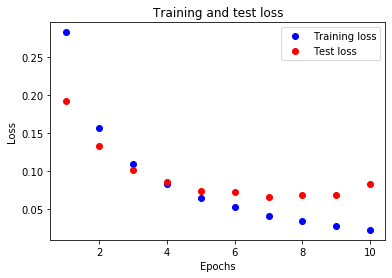

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Accuracy

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

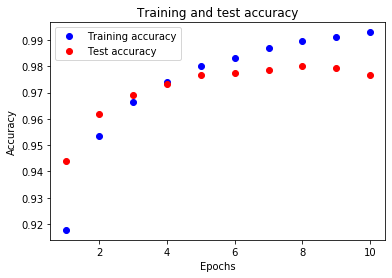

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()